In [1]:
import tensorflow as tf
from tensorflow import reshape
from tensorflow.keras import datasets, layers, models, metrics, Model
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import h5py
print(tf.__version__)

2.0.0


In [3]:
hf = h5py.File('layered-proton-tracks.h5', 'r')

In [4]:
list(hf.keys())

['features', 'targets']

In [5]:
hf['features'].shape

(40000, 128, 128)

In [6]:
hf['targets'].shape

(40000,)

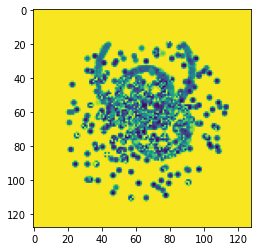

In [7]:
plt.imshow(hf['features'][14])

In [8]:
print(hf['targets'][14])

3


In [9]:
data = hf['features']
label = hf['targets']

In [10]:
train_data = data[0:32000]
test_data = data[32000:40000]
train_label = label[0:32000]
test_label = label[32000:40000]

In [11]:
image_width, image_length = 128, 128
image_shape = (128,128)

#Reshape data (https://www.machinecurve.com/index.php/2020/04/13/how-to-use-h5py-and-keras-to-train-with-data-from-hdf5-files/)
train_data = train_data.reshape((len(train_data), image_width, image_length))
test_data = test_data.reshape((len(test_data), image_width, image_length))

In [12]:
#Normalize datasets
train_data = train_data/255.0
test_data = test_data/255.0

In [13]:
#This callback will stop the training when there is no improvement in 
#the validation loss for [patience] consecutive epochs.

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [14]:
FCNN_model = tf.keras.Sequential()
FCNN_model.add(layers.Flatten(input_shape=(128,128)))
FCNN_model.add(layers.Dense(250, activation='relu'))
FCNN_model.add(layers.Dropout(0.5))
FCNN_model.add(layers.Dense(250, activation='relu'))
FCNN_model.add(layers.Dropout(0.5))
FCNN_model.add(layers.Dense(4, activation = 'softmax'))

In [15]:
FCNN_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00002), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=['accuracy'])

In [16]:
FCNN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 250)               4096250   
_________________________________________________________________
dropout (Dropout)            (None, 250)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 1004      
Total params: 4,160,004
Trainable params: 4,160,004
Non-trainable params: 0
______________________________________________

In [17]:
FCNN_history = FCNN_model.fit(train_data, train_label,
                             epochs=80,
                             batch_size = 32,
                             shuffle = True,
                             callbacks = [callback],
                             validation_split = 0.3
                             )

Train on 22400 samples, validate on 9600 samples
Epoch 1/80
22400/22400 [==============================] - 5s 231us/sample - loss: 1.1065 - accuracy: 0.3842 - val_loss: 0.9278 - val_accuracy: 0.3783
Epoch 2/80
22400/22400 [==============================] - 4s 189us/sample - loss: 0.9557 - accuracy: 0.4740 - val_loss: 0.8039 - val_accuracy: 0.5211
Epoch 3/80
22400/22400 [==============================] - 4s 196us/sample - loss: 0.8725 - accuracy: 0.5454 - val_loss: 0.7964 - val_accuracy: 0.6172
Epoch 4/80
22400/22400 [==============================] - 5s 216us/sample - loss: 0.8168 - accuracy: 0.5939 - val_loss: 0.7084 - val_accuracy: 0.7057
Epoch 5/80
22400/22400 [==============================] - 5s 208us/sample - loss: 0.7748 - accuracy: 0.6294 - val_loss: 0.6729 - val_accuracy: 0.6983
Epoch 6/80
22400/22400 [==============================] - 5s 208us/sample - loss: 0.7405 - accuracy: 0.6535 - val_loss: 0.6368 - val_accuracy: 0.7048
Epoch 7/80
22400/22400 [===========================

Epoch 55/80
22400/22400 [==============================] - 4s 195us/sample - loss: 0.1531 - accuracy: 0.9493 - val_loss: 0.0726 - val_accuracy: 0.9825
Epoch 56/80
22400/22400 [==============================] - 4s 198us/sample - loss: 0.1521 - accuracy: 0.9484 - val_loss: 0.0628 - val_accuracy: 0.9884
Epoch 57/80
22400/22400 [==============================] - 4s 196us/sample - loss: 0.1408 - accuracy: 0.9528 - val_loss: 0.0629 - val_accuracy: 0.9892
Epoch 58/80
22400/22400 [==============================] - 4s 196us/sample - loss: 0.1440 - accuracy: 0.9532 - val_loss: 0.0627 - val_accuracy: 0.9889
Epoch 59/80
22400/22400 [==============================] - 4s 195us/sample - loss: 0.1422 - accuracy: 0.9532 - val_loss: 0.0696 - val_accuracy: 0.9840
Epoch 60/80
22400/22400 [==============================] - 4s 193us/sample - loss: 0.1370 - accuracy: 0.9550 - val_loss: 0.0694 - val_accuracy: 0.9814
Epoch 61/80
22400/22400 [==============================] - 4s 194us/sample - loss: 0.1338 - ac

In [18]:
result = FCNN_model.evaluate(test_data, test_label, verbose=2)

8000/1 - 1s - loss: 0.0218 - accuracy: 0.9940


In [19]:
predictions = np.argmax(FCNN_model.predict(test_data[:]), axis=1)

In [20]:
print(classification_report(test_label, predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2633
           2       1.00      0.99      0.99      2693
           3       0.99      1.00      0.99      2674

    accuracy                           0.99      8000
   macro avg       0.99      0.99      0.99      8000
weighted avg       0.99      0.99      0.99      8000



In [21]:
print(FCNN_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


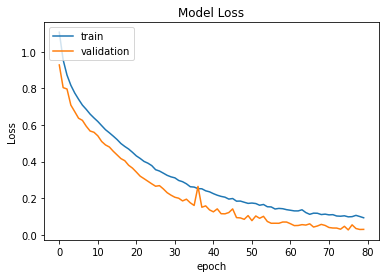

In [22]:
plt.plot(FCNN_history.history['loss'])
plt.plot(FCNN_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import itertools

In [24]:
cm = confusion_matrix(test_label, predictions)

In [25]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         include_values=True,
                         cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

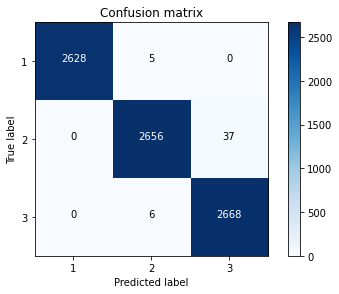

In [26]:
cm_plot_labels = ['1', '2', '3']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion matrix')